In [14]:
from pickle import FALSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import iqr

# Step 1: Load Data and Prepare Numeric Data
Train = pd.read_csv("/Users/vignesh/RStudio/IDA_Homework/IDA Assignemnt 6/2024-ise-dsa-5103-ida-hw-6/Train.csv/Train.csv", encoding='ISO-8859-1')
Train_Numeric = Train.select_dtypes(include=[np.number])

# Function for Calculating Q1 and Q3 Quartiles
def Q1(x):
    return np.percentile(x.dropna(), 25)

def Q3(x):
    return np.percentile(x.dropna(), 75)

# Function for Summary Statistics
def myNumericSummary(x):
    return [
        len(x), x.nunique(), x.isna().sum(), x.mean(skipna=True),
        x.min(skipna=True), Q1(x), x.median(skipna=True),
        Q3(x), x.max(skipna=True), x.std(skipna=True)
    ]

# Step 2: Compute Summary of Numeric Data
numeric_summary = pd.DataFrame({
    col: myNumericSummary(Train_Numeric[col]) for col in Train_Numeric.columns
}).T
numeric_summary.columns = ["n", "unique", "missing", "mean", "min", "Q1", "median", "Q3", "max", "sd"]
numeric_summary['missing_pct'] = 100 * numeric_summary['missing'] / numeric_summary['n']
numeric_summary['unique_pct'] = 100 * numeric_summary['unique'] / numeric_summary['n']
numeric_summary.reset_index(inplace=True)
numeric_summary.rename(columns={'index': 'variable'}, inplace=True)

# Step 3: Remove Unwanted Columns
Train_Numeric = Train_Numeric.drop(columns=['adwordsClickInfo.page', 'bounces', 'newVisits', 'sessionId'], errors='ignore')
Train_Numeric

,custId,visitStartTime,visitNumber,timeSinceLastVisit,isMobile,isTrueDirect,pageviews,revenue
0,1795,1493117200,1,0,0,0,1.0,0.0
1,1797,1473037945,1,0,0,0,1.0,0.0
2,1799,1483011213,1,0,0,0,1.0,0.0
3,1800,1471890172,1,0,0,0,1.0,0.0
4,1801,1495146428,1,0,1,1,6.0,0.0
...,...,...,...,...,...,...,...,...
70066,96284,1472052368,1,0,0,1,1.0,0.0
70067,96285,1485307858,1,0,1,1,1.0,0.0
70068,96286,1497125410,1,0,1,0,1.0,0.0
70069,96287,1493072323,1,0,0,0,1.0,0.0


In [15]:

# Recompute Summary of Numeric Data after Removing Columns
numeric_summary = pd.DataFrame({
    col: myNumericSummary(Train_Numeric[col]) for col in Train_Numeric.columns
}).T

numeric_summary.columns = ["n", "unique", "missing", "mean", "min", "Q1", "median", "Q3", "max", "sd"]
numeric_summary['missing_pct'] = 100 * numeric_summary['missing'] / numeric_summary['n']
numeric_summary['unique_pct'] = 100 * numeric_summary['unique'] / numeric_summary['n']
numeric_summary.reset_index(inplace=True)
numeric_summary.rename(columns={'index': 'variable'}, inplace=True)
numeric_summary


,variable,n,unique,missing,mean,min,Q1,median,Q3,max,sd,missing_pct,unique_pct
0,custId,70071.0,47249.0,0.0,4.887499e+04,1.795000e+03,2.508100e+04,4.867300e+04,7.258750e+04,9.629000e+04,2.732188e+04,0.000000,67.430178
1,visitStartTime,70071.0,69951.0,0.0,1.485111e+09,1.470035e+09,1.477553e+09,1.484102e+09,1.493100e+09,1.501656e+09,9.106582e+06,0.000000,99.828745
2,visitNumber,70071.0,155.0,0.0,3.145538e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.550000e+02,8.659585e+00,0.000000,0.221204
3,timeSinceLastVisit,70071.0,20970.0,0.0,2.564502e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.037500e+04,3.007452e+07,1.164717e+06,0.000000,29.926789
4,isMobile,70071.0,2.0,0.0,2.294530e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.204840e-01,0.000000,0.002854
5,isTrueDirect,70071.0,2.0,0.0,4.002369e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.899497e-01,0.000000,0.002854
6,pageviews,70071.0,154.0,8.0,6.304112e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,4.690000e+02,1.169309e+01,0.011417,0.219777
7,revenue,70071.0,5850.0,0.0,1.016511e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.598079e+04,9.953418e+01,0.000000,8.348675


In [16]:

# Step 4: Impute Missing Values
imputer = KNNImputer(n_neighbors=5)
Train_Numeric[['pageviews']] = imputer.fit_transform(Train_Numeric[['pageviews']])

# Recompute Summary of Numeric Data after Imputation
numeric_summary = pd.DataFrame({
    col: myNumericSummary(Train_Numeric[col]) for col in Train_Numeric.columns
}).T
numeric_summary.columns = ["n", "unique", "missing", "mean", "min", "Q1", "median", "Q3", "max", "sd"]
numeric_summary['missing_pct'] = 100 * numeric_summary['missing'] / numeric_summary['n']
numeric_summary['unique_pct'] = 100 * numeric_summary['unique'] / numeric_summary['n']
numeric_summary.reset_index(inplace=True)
numeric_summary.rename(columns={'index': 'variable'}, inplace=True)
numeric_summary


,variable,n,unique,missing,mean,min,Q1,median,Q3,max,sd,missing_pct,unique_pct
0,custId,70071.0,47249.0,0.0,4.887499e+04,1.795000e+03,2.508100e+04,4.867300e+04,7.258750e+04,9.629000e+04,2.732188e+04,0.0,67.430178
1,visitStartTime,70071.0,69951.0,0.0,1.485111e+09,1.470035e+09,1.477553e+09,1.484102e+09,1.493100e+09,1.501656e+09,9.106582e+06,0.0,99.828745
2,visitNumber,70071.0,155.0,0.0,3.145538e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.550000e+02,8.659585e+00,0.0,0.221204
3,timeSinceLastVisit,70071.0,20970.0,0.0,2.564502e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.037500e+04,3.007452e+07,1.164717e+06,0.0,29.926789
4,isMobile,70071.0,2.0,0.0,2.294530e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.204840e-01,0.0,0.002854
5,isTrueDirect,70071.0,2.0,0.0,4.002369e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.899497e-01,0.0,0.002854
6,pageviews,70071.0,155.0,0.0,6.304112e+00,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,4.690000e+02,1.169242e+01,0.0,0.221204
7,revenue,70071.0,5850.0,0.0,1.016511e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.598079e+04,9.953418e+01,0.0,8.348675


In [38]:
plt.style.use("ggplot")

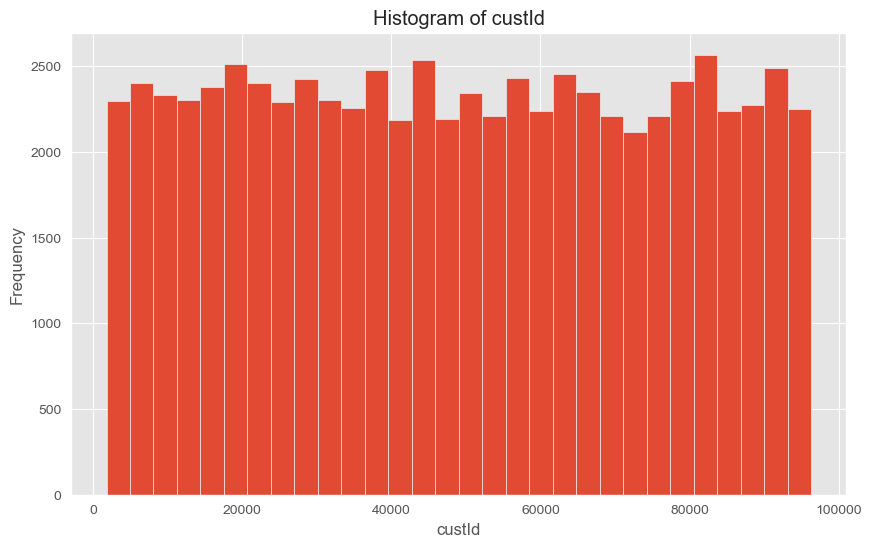

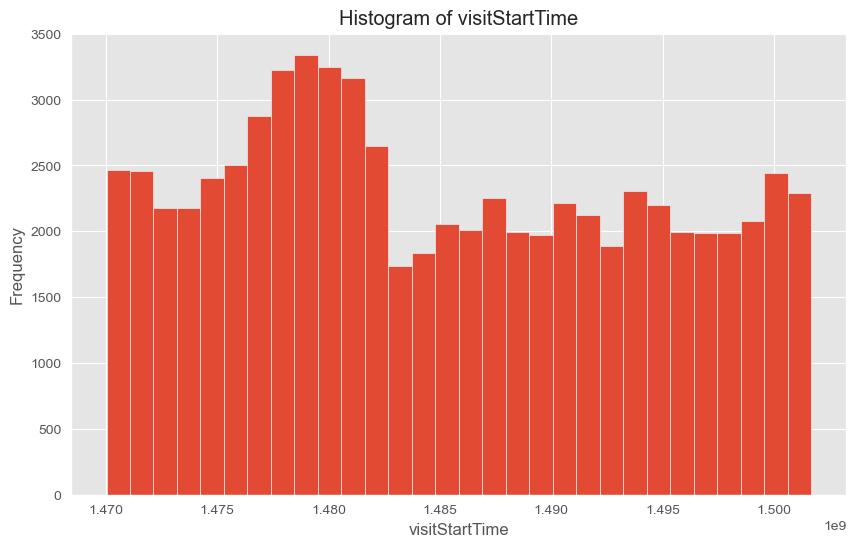

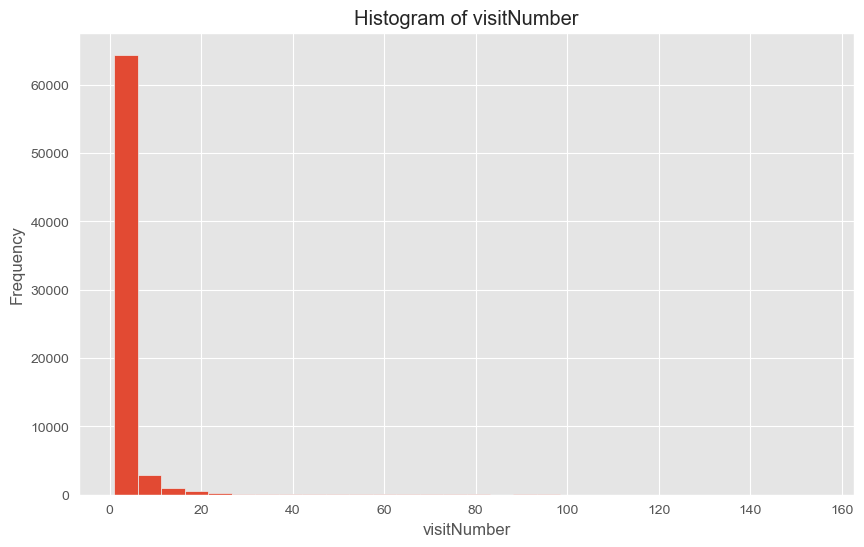

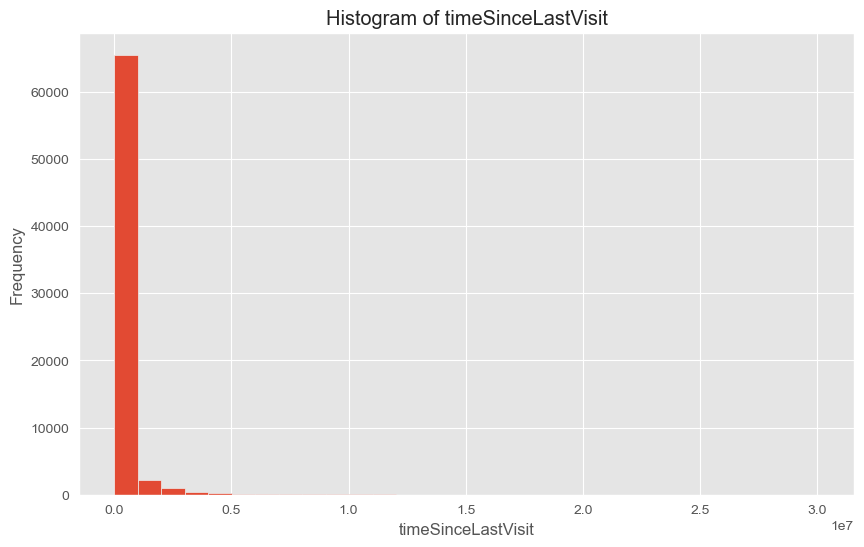

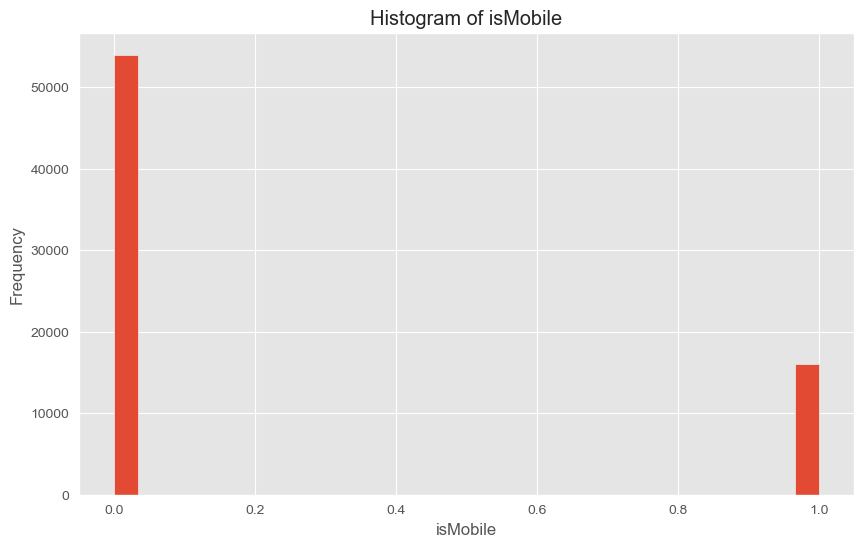

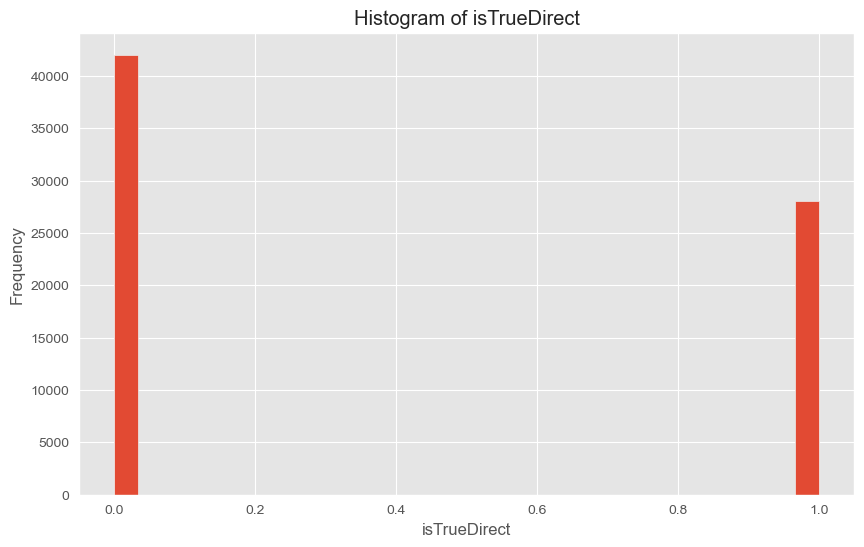

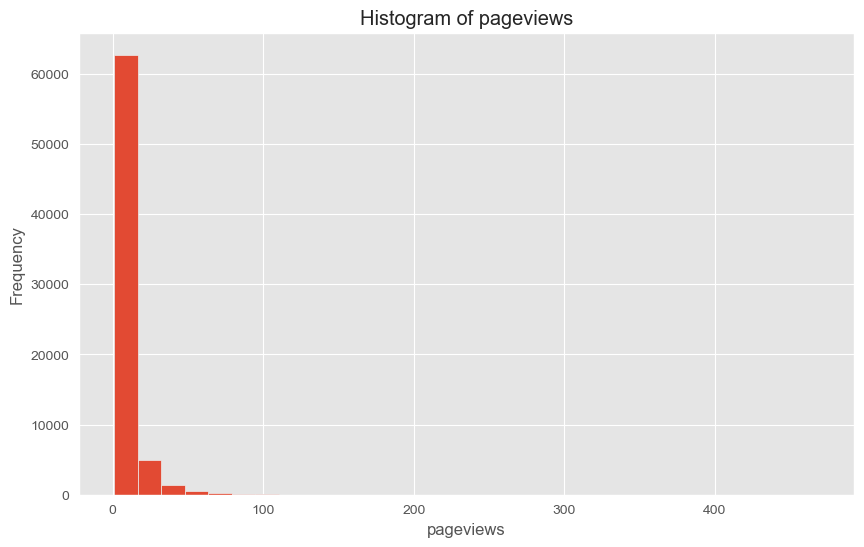

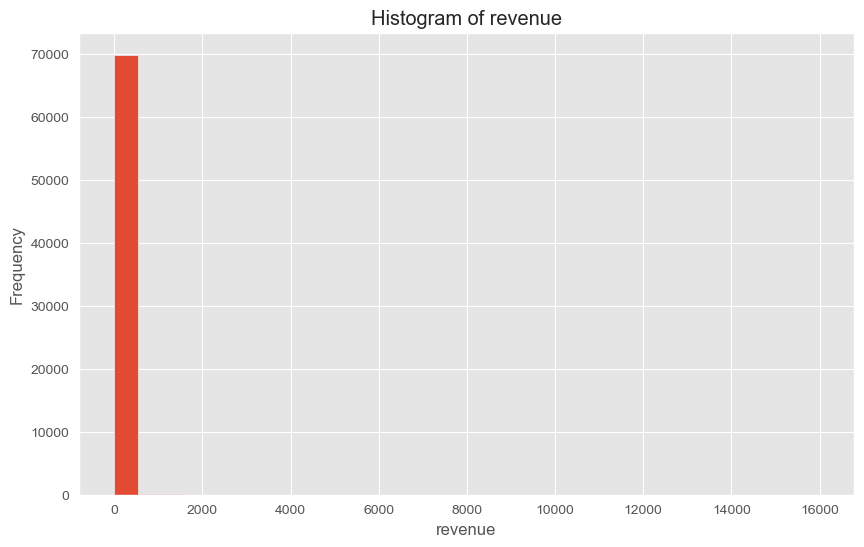

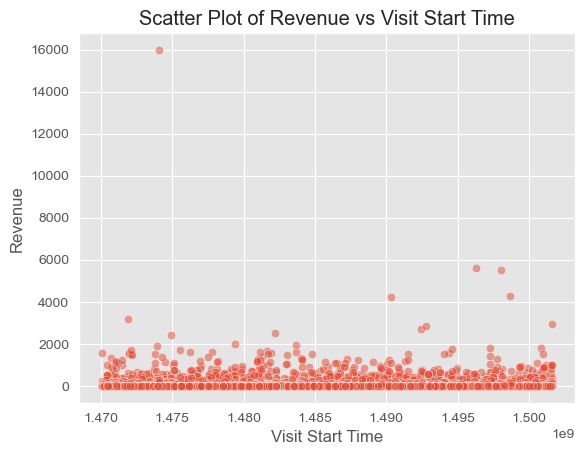

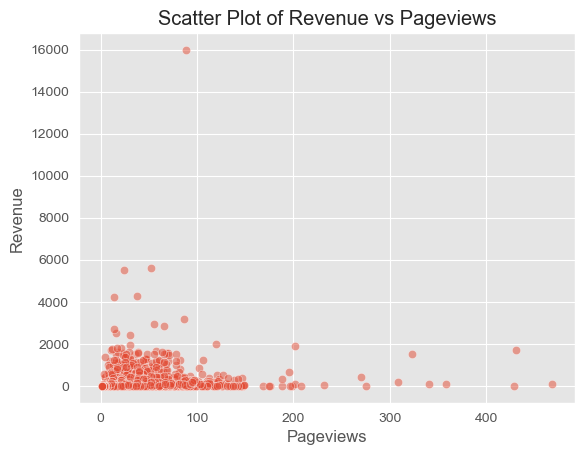

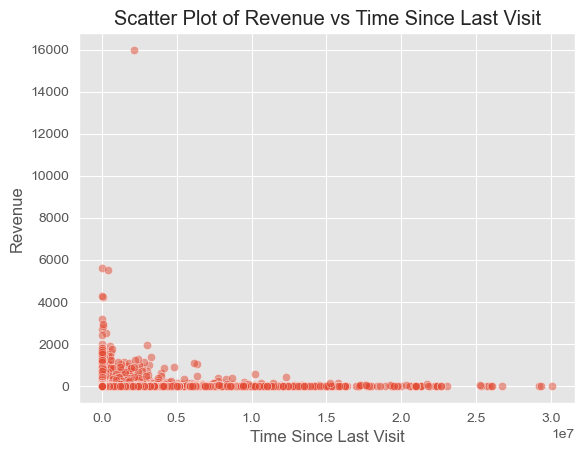

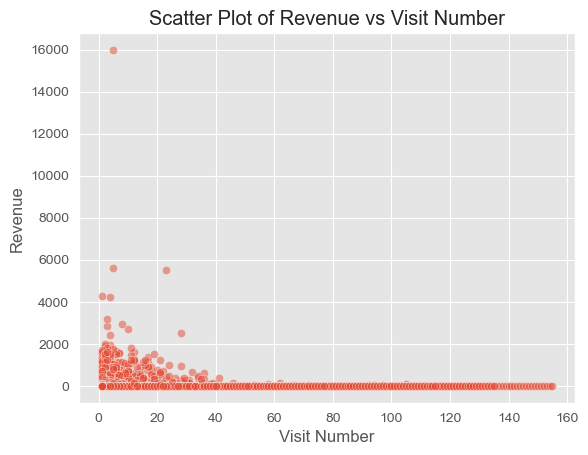

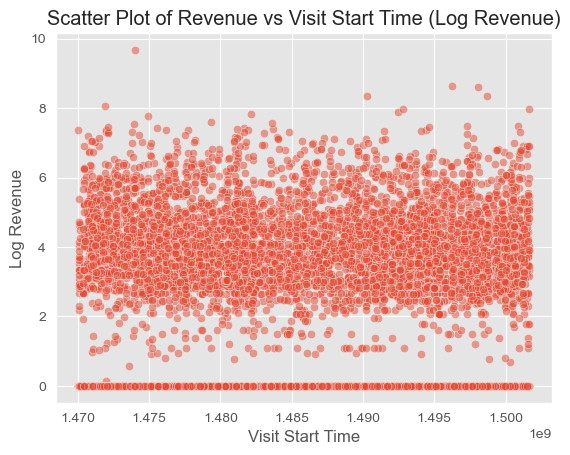

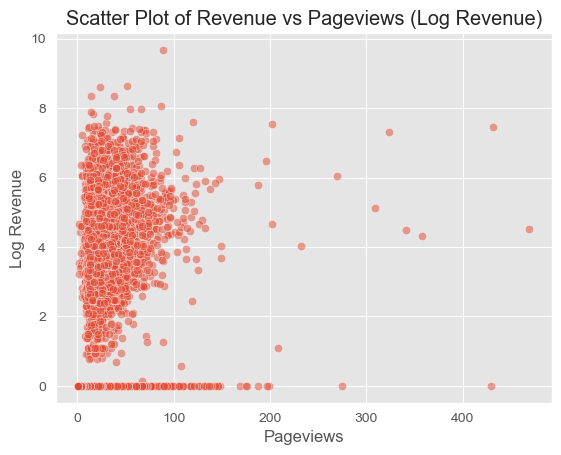

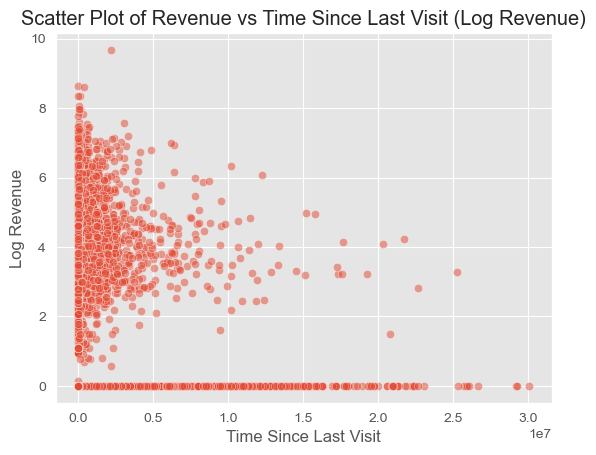

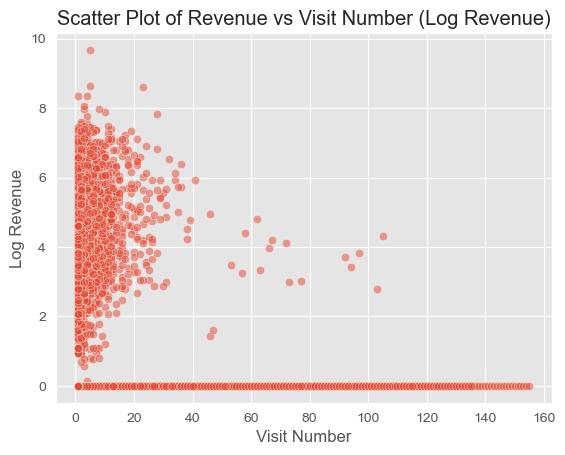

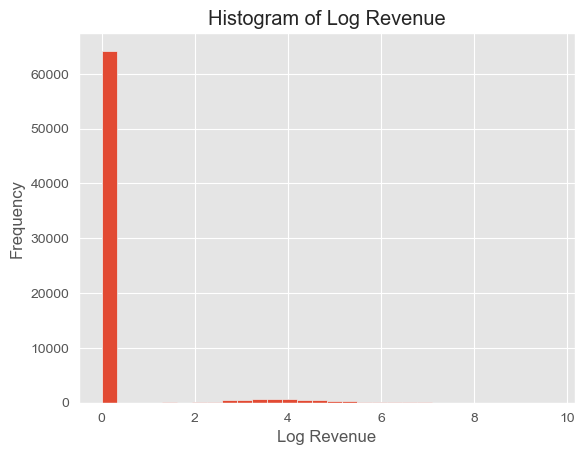

In [39]:

# Step 5: Plot Histograms
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(column_data.dropna(), bins=30)
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()

for col in Train_Numeric.columns:
    plot_histogram(Train_Numeric[col], col)

# Step 6: Scatter Plots
# Scatter Plot of Revenue vs Visit Start Time
sns.scatterplot(x='visitStartTime', y='revenue', data=Train_Numeric, alpha=0.5)
plt.title("Scatter Plot of Revenue vs Visit Start Time")
plt.xlabel("Visit Start Time")
plt.ylabel("Revenue")
plt.show()

# Scatter Plot of Revenue vs Pageviews (excluding specific row if needed)
sns.scatterplot(x='pageviews', y='revenue', data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Pageviews")
plt.xlabel("Pageviews")
plt.ylabel("Revenue")
plt.show()

# Scatter Plot of Revenue vs Time Since Last Visit
sns.scatterplot(x='timeSinceLastVisit', y='revenue', data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Time Since Last Visit")
plt.xlabel("Time Since Last Visit")
plt.ylabel("Revenue")
plt.show()

# Scatter Plot of Revenue vs Visit Number
sns.scatterplot(x='visitNumber', y='revenue', data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Visit Number")
plt.xlabel("Visit Number")
plt.ylabel("Revenue")
plt.show()

# Log-Transformed Revenue Scatter Plots
sns.scatterplot(x='visitStartTime', y=np.log1p(Train_Numeric['revenue']), data=Train_Numeric, alpha=0.5)
plt.title("Scatter Plot of Revenue vs Visit Start Time (Log Revenue)")
plt.xlabel("Visit Start Time")
plt.ylabel("Log Revenue")
plt.show()

sns.scatterplot(x='pageviews', y=np.log1p(Train_Numeric['revenue']), data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Pageviews (Log Revenue)")
plt.xlabel("Pageviews")
plt.ylabel("Log Revenue")
plt.show()

sns.scatterplot(x='timeSinceLastVisit', y=np.log1p(Train_Numeric['revenue']), data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Time Since Last Visit (Log Revenue)")
plt.xlabel("Time Since Last Visit")
plt.ylabel("Log Revenue")
plt.show()

sns.scatterplot(x='visitNumber', y=np.log1p(Train_Numeric['revenue']), data=Train_Numeric.drop(index=[39511]), alpha=0.5)
plt.title("Scatter Plot of Revenue vs Visit Number (Log Revenue)")
plt.xlabel("Visit Number")
plt.ylabel("Log Revenue")
plt.show()

# Log-Revenue Histogram
plt.hist(np.log1p(Train_Numeric['revenue'].dropna()), bins=30)
plt.title("Histogram of Log Revenue")
plt.xlabel("Log Revenue")
plt.ylabel("Frequency")
plt.show()


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Function to compute mode for categorical data
def get_modes(series, mode_type=1):
    counts = series.value_counts()
    if mode_type == 1:
        return counts.idxmax()  # Most common mode
    elif mode_type == 2:
        return counts.drop(counts.idxmax()).idxmax()  # Second most common
    elif mode_type == -1:
        return counts.idxmin()  # Least common
    else:
        raise ValueError("Invalid mode type selected")

# Function to compute the count of mode for categorical data
def get_modes_count(series, mode_type=1):
    counts = series.value_counts()
    if mode_type == 1:
        return counts.max()  # Most common mode frequency
    elif mode_type == 2:
        return counts.drop(counts.idxmax()).max()  # Second most common frequency
    elif mode_type == -1:
        return counts.min()  # Least common frequency
    else:
        raise ValueError("Invalid mode type selected")

# Function for summary of categorical data
def my_factor_summary(series):
    return [
        len(series), series.nunique(), series.isna().sum(),
        get_modes(series, mode_type=1), get_modes_count(series, mode_type=1),
        get_modes(series, mode_type=2), get_modes_count(series, mode_type=2),
        get_modes(series, mode_type=-1), get_modes_count(series, mode_type=-1)
    ]

# Step 1: Extract Categorical Variables
Train_Factor = Train.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))

# Step 2: Summarize Missing Data
Factor_missing_summary = Train_Factor.isna().mean() * 100
Factor_missing_summary = Factor_missing_summary.reset_index().rename(columns={0: 'missing_pct', 'index': 'variable'})
Factor_missing_summary = Factor_missing_summary.sort_values(by='missing_pct', ascending=False)
Factor_missing_summary


,variable,missing_pct
18,adContent,98.799789
22,adwordsClickInfo.isVideoAd,97.415479
21,adwordsClickInfo.adNetworkType,97.415479
19,adwordsClickInfo.slot,97.415479
20,adwordsClickInfo.gclId,97.394072
16,keyword,96.205278
13,campaign,96.059711
9,metro,70.190236
17,referralPath,61.454810
10,city,55.697792


In [41]:
# Function to compute mode for Factor data
def get_mode(v, type=1):
    counts = Counter(v.dropna())
    if type == 1:
        return counts.most_common(1)[0][0]
    elif type == 2:
        return counts.most_common(2)[-1][0]
    elif type == -1:
        return min(counts, key=counts.get)
    else:
        raise ValueError("Invalid type selected")

# Function to compute the count of mode for Factor data
def get_mode_count(v, type=1):
    counts = Counter(v.dropna())
    if type == 1:
        return counts.most_common(1)[0][1]
    elif type == 2:
        return counts.most_common(2)[-1][1]
    elif type == -1:
        return counts[min(counts, key=counts.get)]
    else:
        raise ValueError("Invalid type selected")

# Function to summarize factor data
def my_factor_summary(df):
    return pd.DataFrame({
        "Length": [len(df)],
        "Unique": [df.nunique()],
        "Missing": [df.isnull().sum()],
        "Mode_1": [get_mode(df, 1)],
        "Mode_1_Count": [get_mode_count(df, 1)],
        "Mode_2": [get_mode(df, 2)],
        "Mode_2_Count": [get_mode_count(df, 2)],
        "Least_Common": [get_mode(df, -1)],
        "Least_Common_Count": [get_mode_count(df, -1)]
    })

# Step 1: Extract Factor Variables
Train_Factor = Train.select_dtypes(include="object").apply(lambda x: x.astype('category'))

# Step 2: Summarize Missing Data
Factor_missing_summary = Train_Factor.isnull().mean().sort_values(ascending=False) * 100
print(Factor_missing_summary)

# Step 3: Remove Unwanted Columns
columns_to_drop = ['adContent', 'adwordsClickInfo.slot', 'adwordsClickInfo.adNetworkType',
                   'adwordsClickInfo.gclId', 'keyword', 'campaign', 'metro',
                   'referralPath', 'city', 'region', 'networkDomain', 'topLevelDomain','adwordsClickInfo.isVideoAd']
Train_Factor = Train_Factor.drop(columns=columns_to_drop)
Train_Factor

adContent                         98.799789
adwordsClickInfo.isVideoAd        97.415479
adwordsClickInfo.adNetworkType    97.415479
adwordsClickInfo.slot             97.415479
adwordsClickInfo.gclId            97.394072
keyword                           96.205278
campaign                          96.059711
metro                             70.190236
referralPath                      61.454810
city                              55.697792
region                            54.922864
topLevelDomain                    47.734441
networkDomain                     47.734441
medium                            16.878595
operatingSystem                    0.438127
country                            0.121306
subContinent                       0.121306
continent                          0.121306
source                             0.002854
browser                            0.001427
channelGrouping                    0.000000
deviceCategory                     0.000000
date                            

,date,channelGrouping,browser,operatingSystem,deviceCategory,continent,subContinent,country,source,medium
0,2017-04-25,Social,Chrome,Windows,desktop,Asia,Southern Asia,India,quora.com,referral
1,2016-09-04,Social,Safari,Macintosh,desktop,Americas,Northern America,United States,youtube.com,referral
2,2016-12-29,Organic Search,Chrome,Windows,desktop,Asia,Southern Asia,India,google,organic
3,2016-08-22,Social,Safari,Macintosh,desktop,Africa,Eastern Africa,Zambia,youtube.com,referral
4,2017-05-18,Direct,Chrome,Android,mobile,Americas,Northern America,United States,(direct),NaN
...,...,...,...,...,...,...,...,...,...,...
70066,2016-08-24,Direct,Firefox,Windows,desktop,Americas,Northern America,United States,(direct),NaN
70067,2017-01-24,Direct,Safari (in-app),iOS,tablet,Europe,Northern Europe,Norway,(direct),NaN
70068,2017-06-10,Organic Search,Safari,iOS,tablet,Europe,Northern Europe,United Kingdom,google,organic
70069,2017-04-24,Organic Search,Chrome,Linux,desktop,Americas,Northern America,United States,google,organic


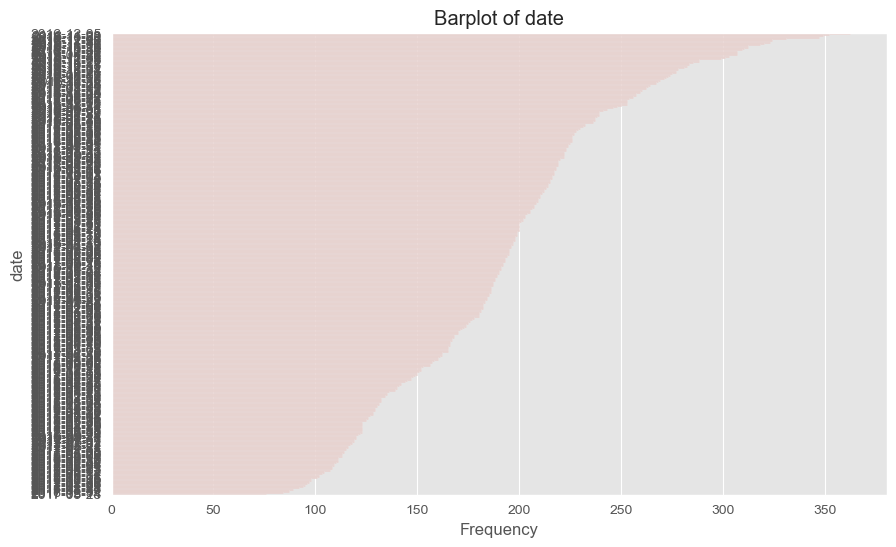

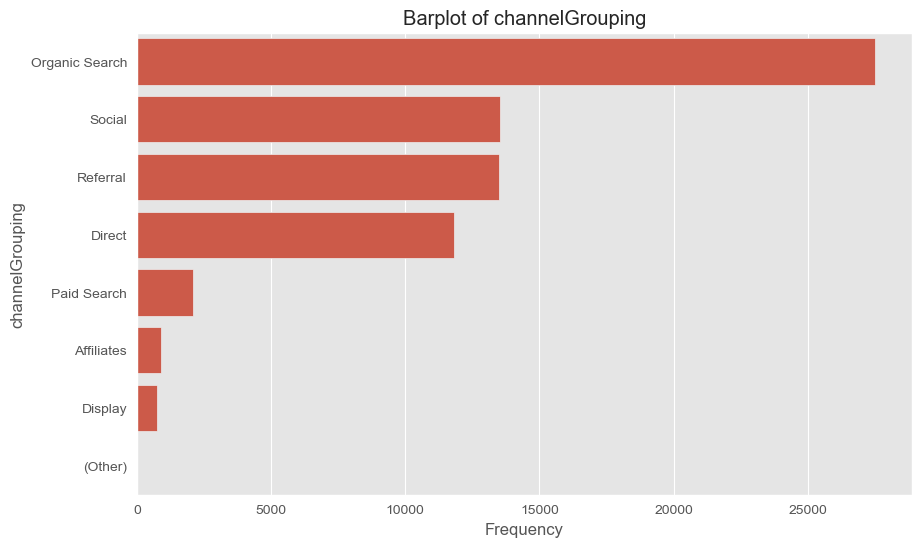

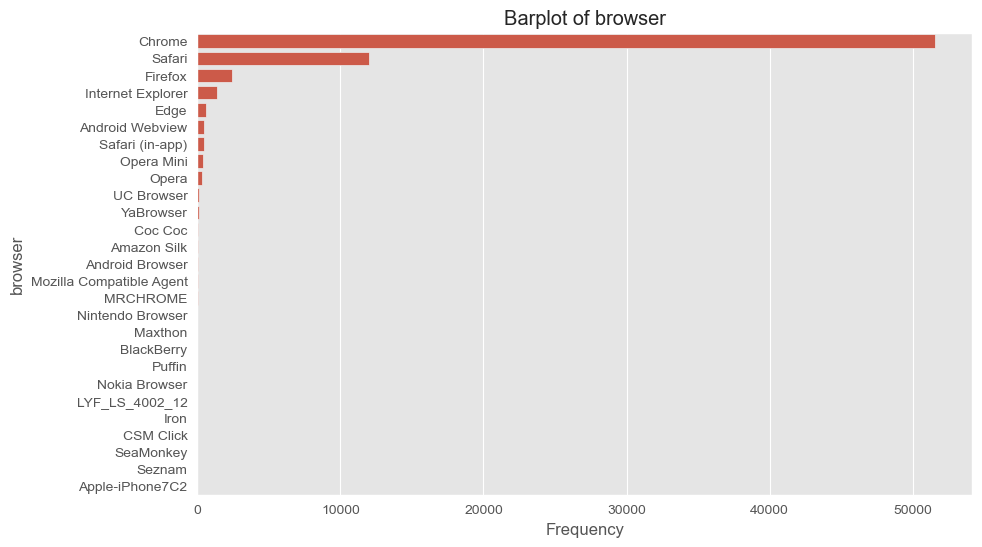

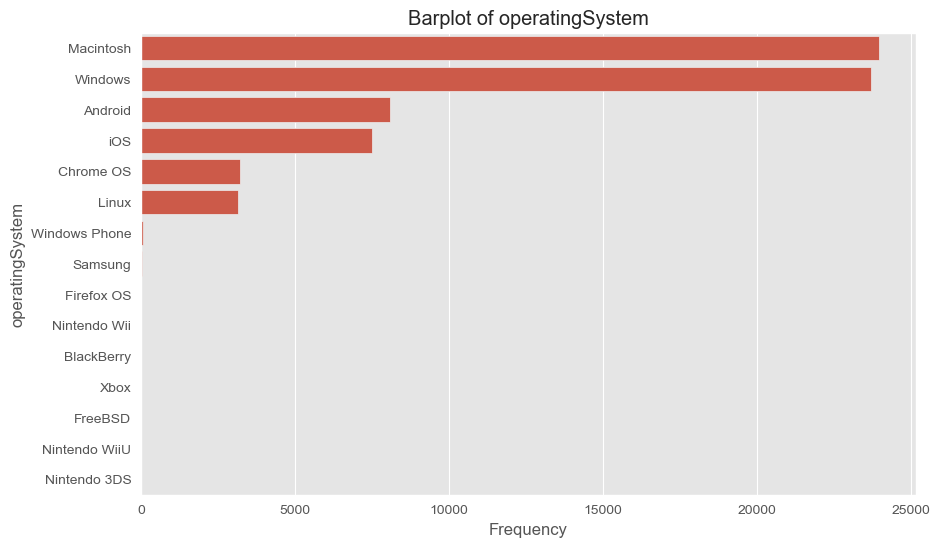

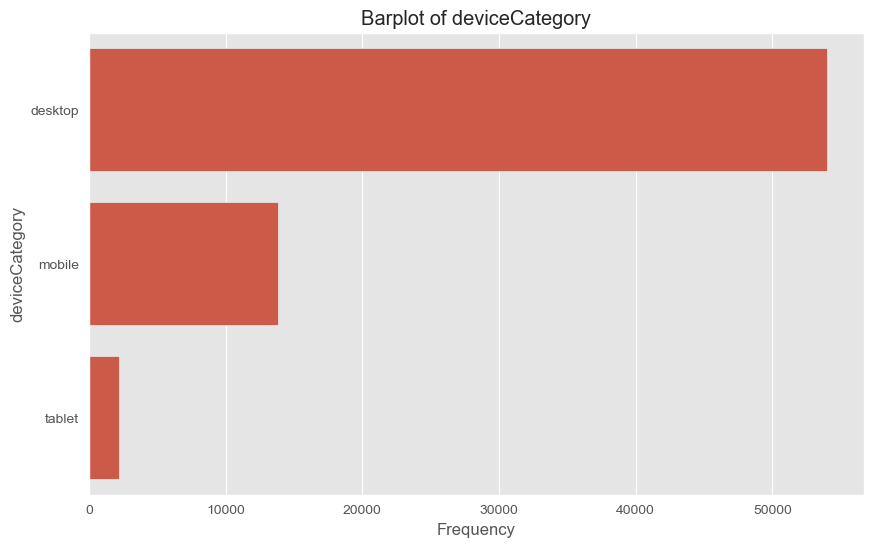

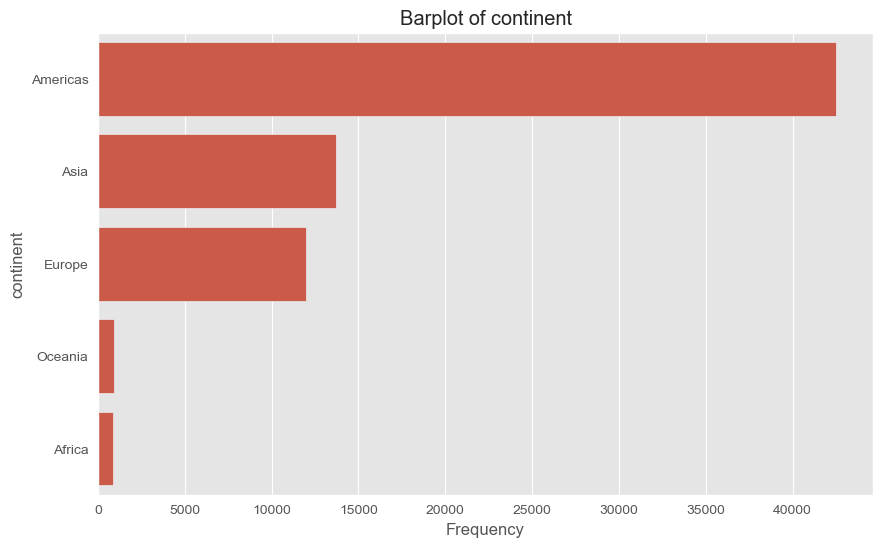

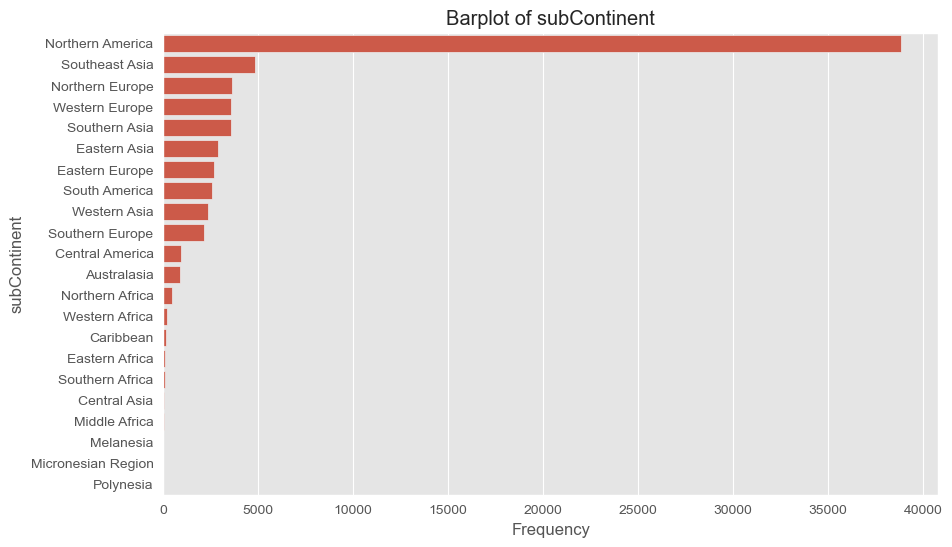

/Users/vignesh/anaconda3/envs/MLP_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


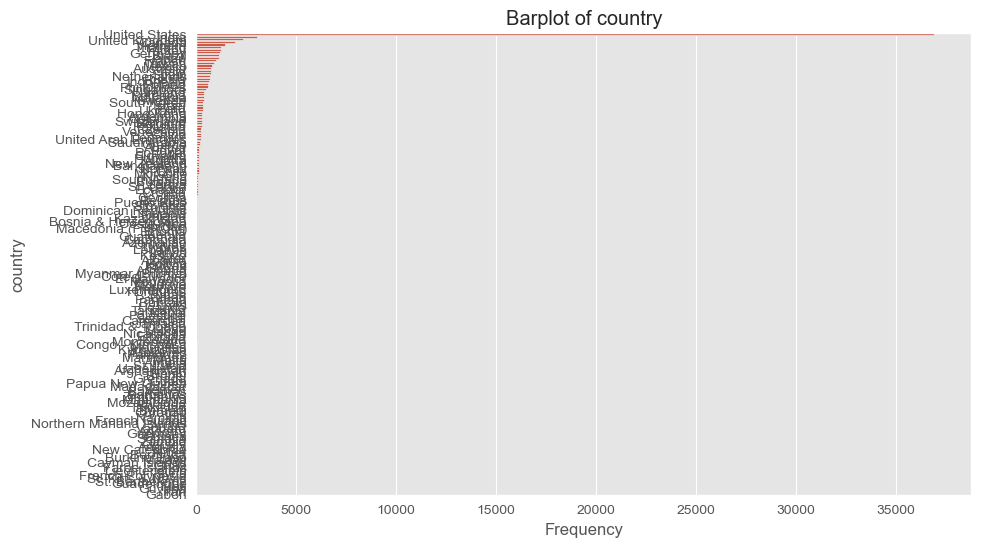

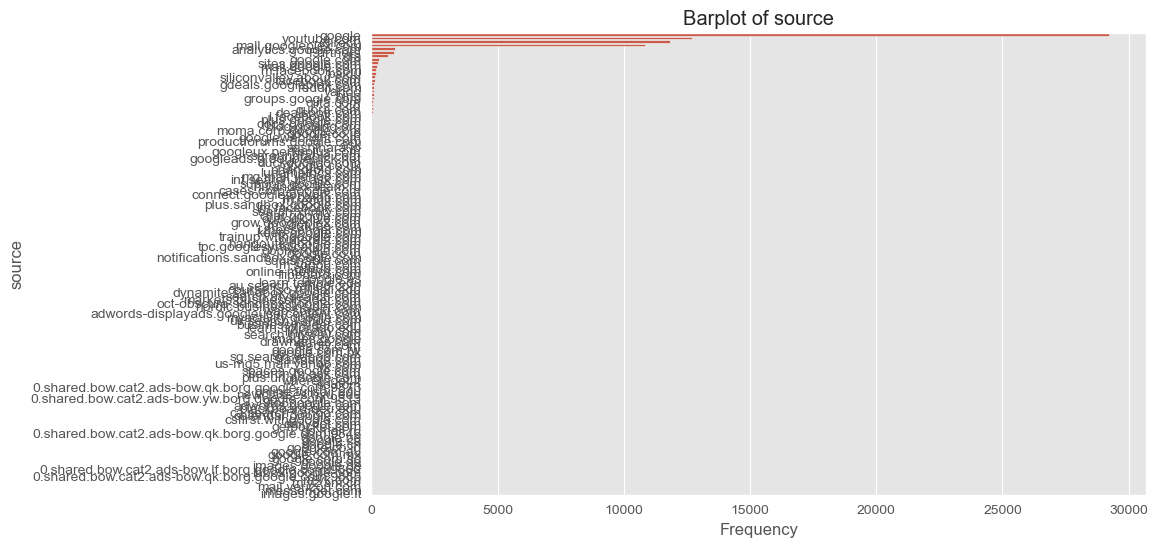

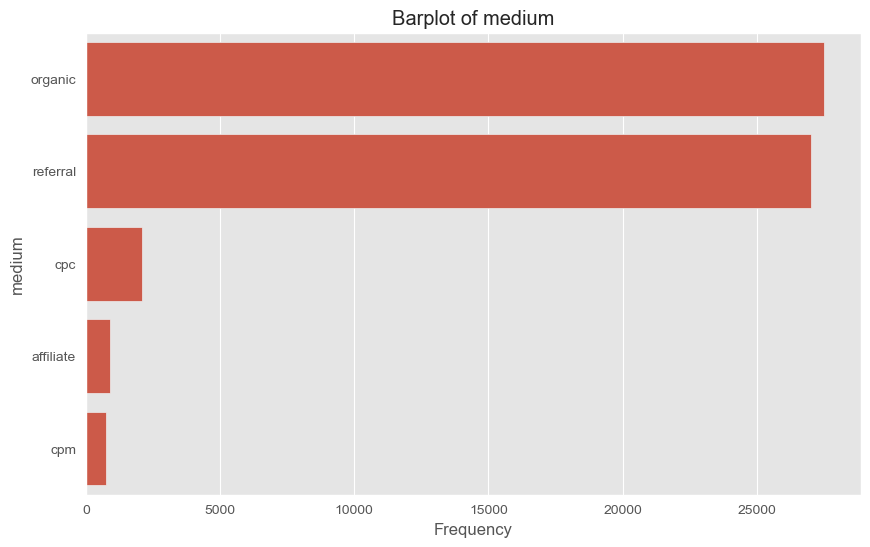

In [42]:
# Step 4: Plot Barplots
def plot_barplot(column_data, column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column_data, order=column_data.value_counts().index)
    plt.title(f"Barplot of {column_name}")
    plt.xlabel("Frequency")
    plt.ylabel(column_name)
    plt.show()

for column_name in Train_Factor.columns:
    plot_barplot(Train_Factor[column_name], column_name)

In [43]:
# Merge `revenue` from `Train_Numeric` into `Train_Factor`
Train_Factor = Train_Factor.join(Train_Numeric['revenue'], how='left')



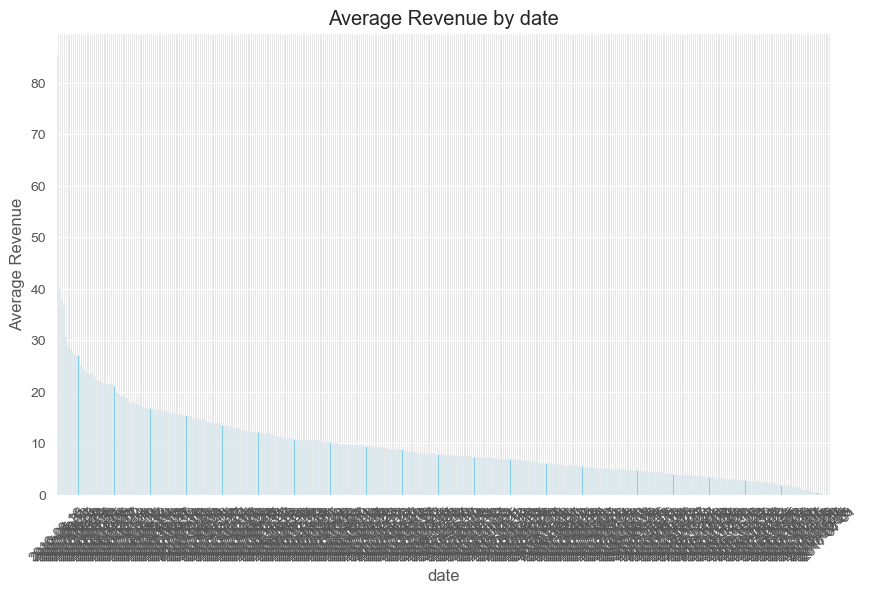

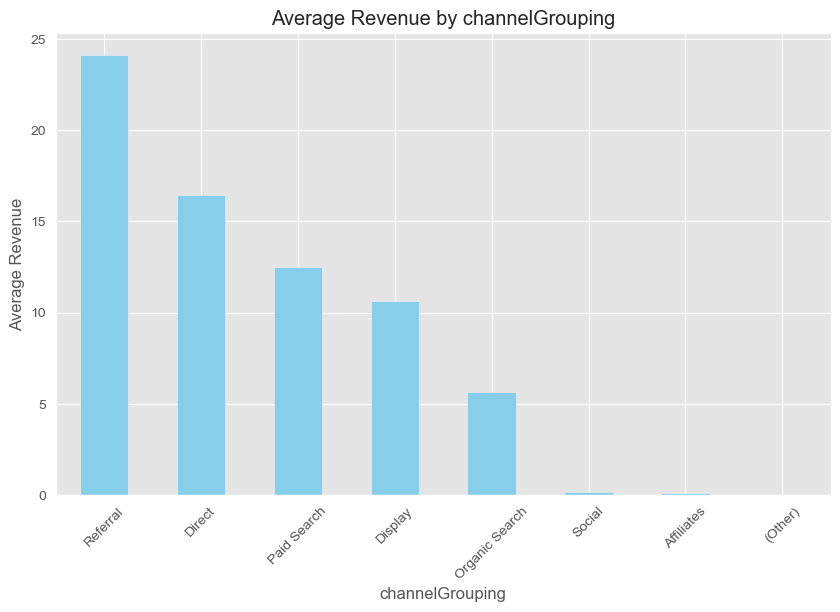

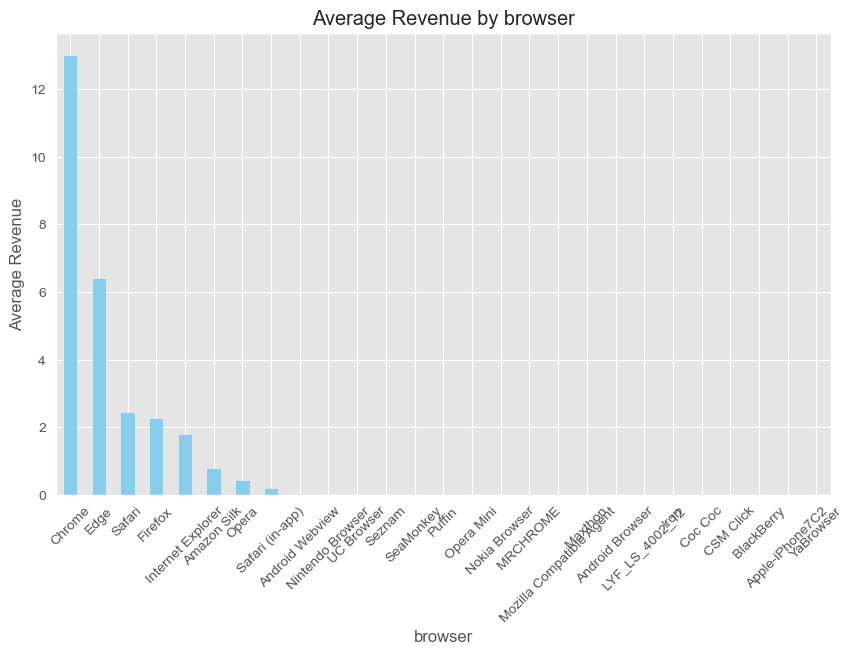

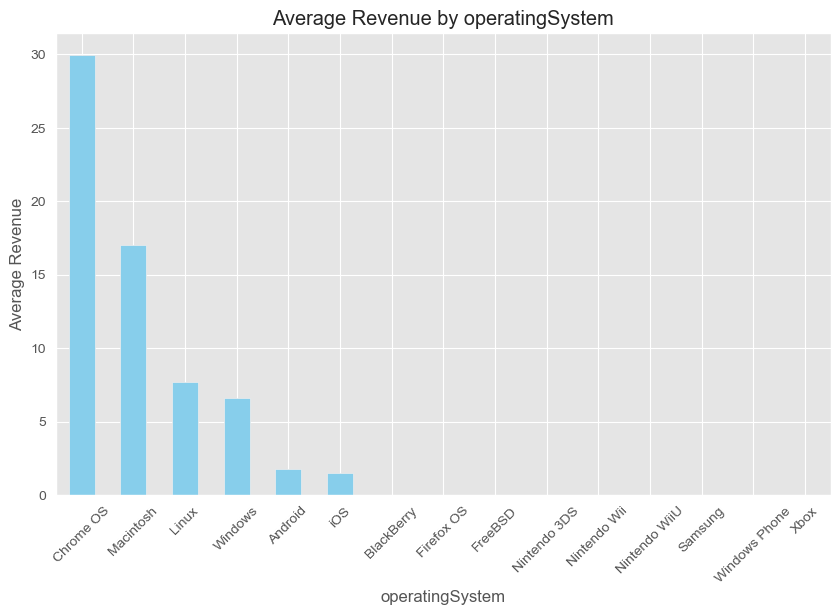

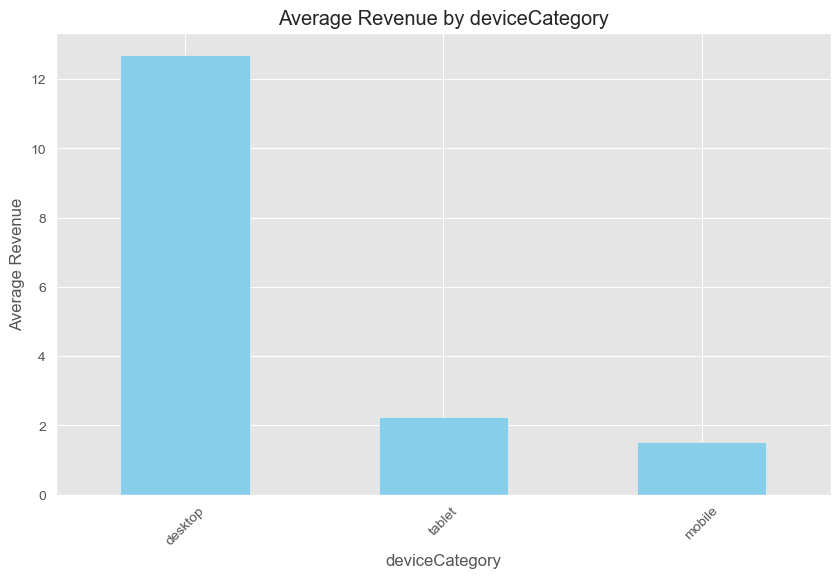

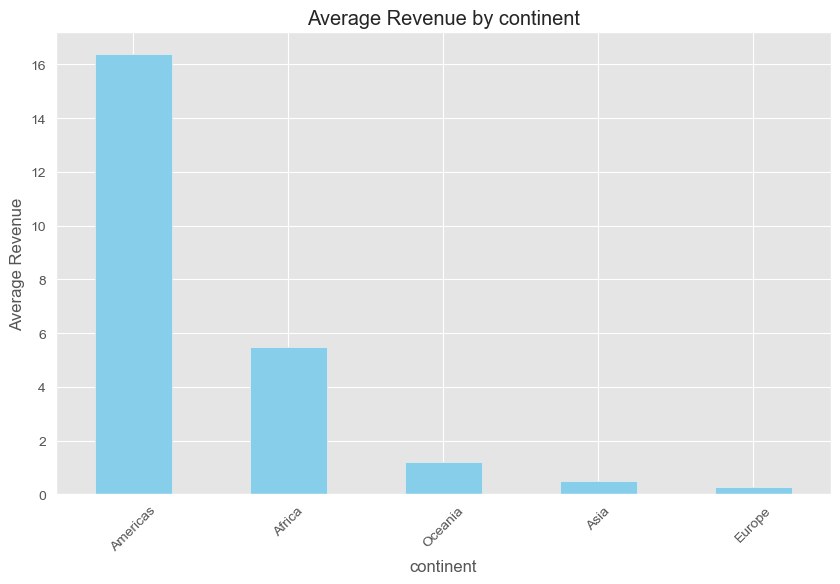

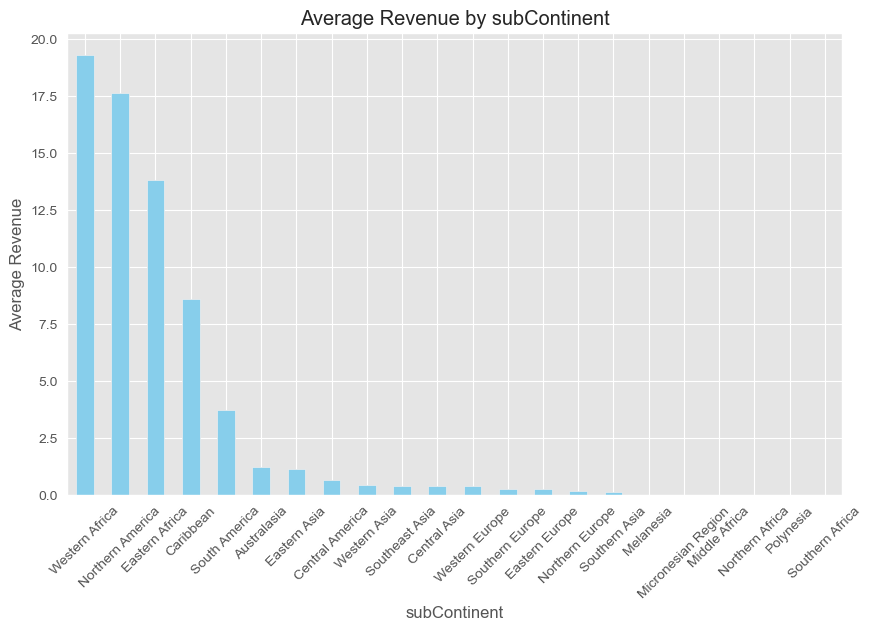

/Users/vignesh/anaconda3/envs/MLP_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


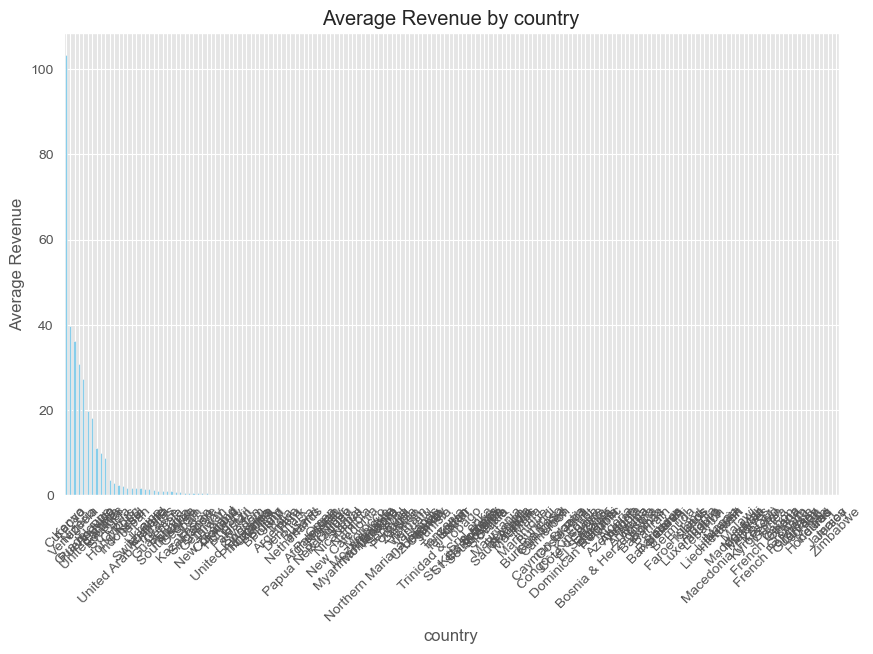

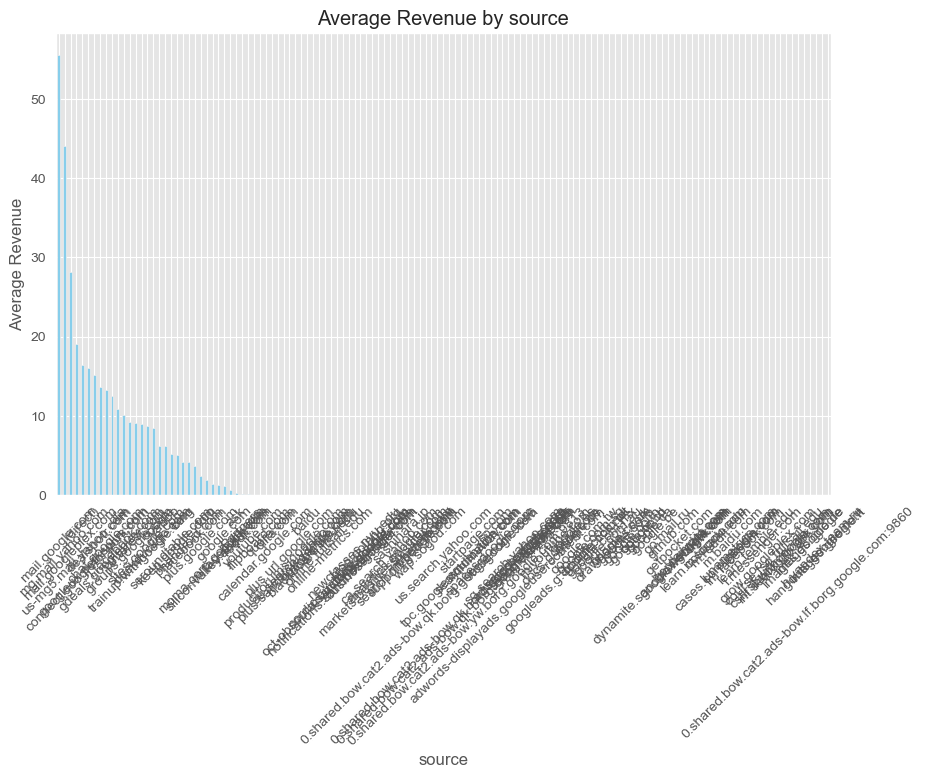

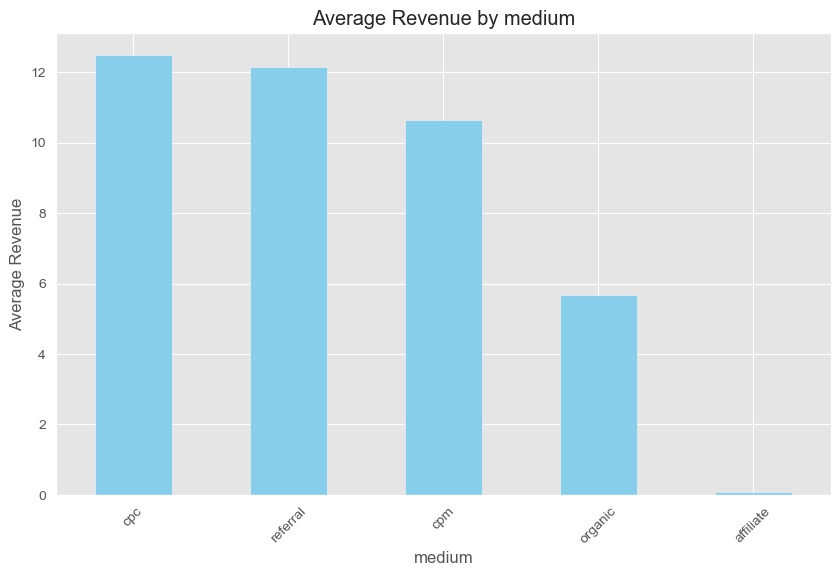

In [44]:
# Function to create bar plots for average revenue per level of factor variables
def plot_avg_revenue(df, column_name):
    avg_revenue = df.groupby(column_name, observed=False)['revenue'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    avg_revenue.plot(kind="bar", color="skyblue")
    plt.title(f"Average Revenue by {column_name}")
    plt.ylabel("Average Revenue")
    plt.xlabel(column_name)
    plt.xticks(rotation=45)
    plt.show()

# Run the plotting function for each factor column
for column_name in Train_Factor.columns:
    if column_name != 'revenue':  # Avoid trying to group by 'revenue' itself
        plot_avg_revenue(Train_Factor, column_name)